# <font color='orange'> Lab | Feature engineering  </font>

- Instructions
- Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.
- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary.

In [169]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
data=pd.read_csv('learningSetCatClean.csv')
data=data.drop(['Unnamed: 0'], axis=1)
data

,odatedw,tcode,state,dob,noexch,mdmaud,domain,cluster,age,ageflag,...,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,0,IL,3712,0,XXXX,T2,36,60.0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,5202,0,XXXX,S1,14,46.0,E,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,0,0,XXXX,R2,43,NaN,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,2801,0,XXXX,R2,44,70.0,E,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,2001,0,XXXX,S2,16,78.0,E,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,0,0,XXXX,C2,27,NaN,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,5001,0,XXXX,C1,24,48.0,E,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,3801,0,XXXX,C3,30,60.0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,4005,0,XXXX,C1,24,58.0,E,...,18.0,1,L,4,F,X,X,X,11.0,A


In [171]:
numerical=data.select_dtypes(include=["number"])
numerical

,odatedw,tcode,dob,age,numchld,income,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [172]:
# Check for null values in the numerical columns.
numerical.columns

Index(['odatedw', 'tcode', 'dob', 'age', 'numchld', 'income', 'wealth1', 'hit',
       'mbcraft', 'mbgarden',
       ...
       'fistdate', 'nextdate', 'timelag', 'avggift', 'controln', 'target_b',
       'target_d', 'hphone_d', 'rfa_2f', 'cluster2'],
      dtype='object', length=407)

In [173]:
def replacemean(x):
  for i in (x.select_dtypes(np.number)):
    x[i]=x[i].fillna(np.mean(x[i]))
  return x

In [174]:
replacemean(data)

,odatedw,tcode,state,dob,noexch,mdmaud,domain,cluster,age,ageflag,...,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,0,IL,3712,0,XXXX,T2,36,60.000000,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,5202,0,XXXX,S1,14,46.000000,E,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,0,0,XXXX,R2,43,61.611649,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,2801,0,XXXX,R2,44,70.000000,E,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,2001,0,XXXX,S2,16,78.000000,E,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,0,0,XXXX,C2,27,61.611649,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,5001,0,XXXX,C1,24,48.000000,E,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,3801,0,XXXX,C3,30,60.000000,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,4005,0,XXXX,C1,24,58.000000,E,...,18.0,1,L,4,F,X,X,X,11.0,A


In [175]:
# Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
# geocode
data['geocode2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: geocode2, dtype: int64

In [176]:
data['geocode2'].replace(' ', np.nan, inplace=True)
data['geocode2'].isnull().sum()

319

In [177]:
data['geocode2']=data['geocode2'].fillna('A')
data['geocode2'].unique()

array(['C', 'A', 'D', 'B'], dtype=object)

In [178]:
# WEALTH1 esta limpia
data['wealth1'].value_counts()

5.345699    44732
9.000000     7585
8.000000     6793
7.000000     6198
6.000000     5825
5.000000     5280
4.000000     4810
3.000000     4237
2.000000     4085
1.000000     3454
0.000000     2413
Name: wealth1, dtype: int64

In [179]:
# ADI
data['adi'].value_counts()


13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: adi, Length: 205, dtype: int64

In [180]:
data['adi'].isnull().sum()

0

In [181]:
# DMA
data['dma'].value_counts()


803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: dma, Length: 207, dtype: int64

In [182]:
data['dma'].isnull().sum()

0

In [183]:
# MSA
data['msa'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: msa, Length: 299, dtype: int64

In [184]:
data['msa'].isnull().sum()

0

In [185]:
# - Use appropriate EDA technique where ever necessary.
data.shape

(95412, 449)

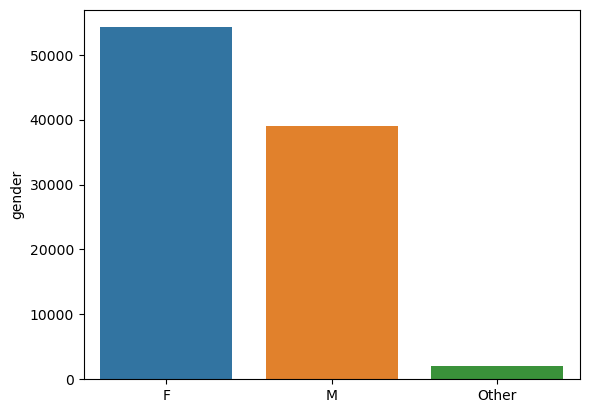

In [188]:
sns.barplot(x=data['gender'].unique() , y=data['gender'].value_counts() , data=data)
plt.show()

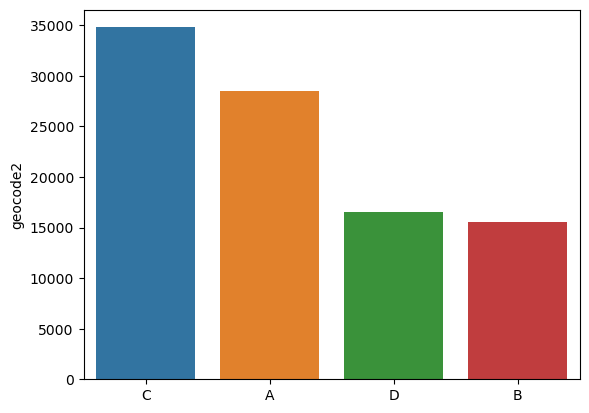

In [189]:
sns.barplot(x=data['geocode2'].unique() , y=data['geocode2'].value_counts() , data=data)
plt.show()

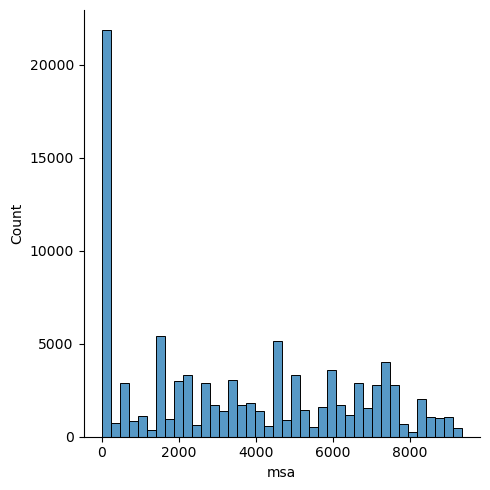

In [192]:
sns.displot(data['msa'])
plt.show()

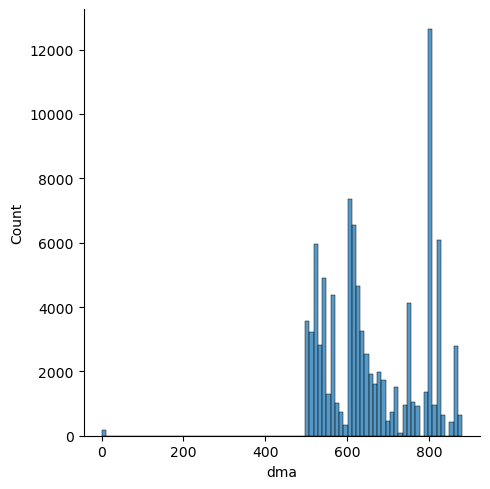

In [193]:
sns.displot(data['dma'])
plt.show()